### Machine Learning

컴퓨터가 데이터로부터 스스로 학습을 할 수 있도록 프로그래밍하는 과학적인 활동이라고 한다
문제 파악(정의) -> 머신러닝 모델 학습 -> 예측 -> 평가 -> 서비스 도입

Model : 어떠한 문제를 해결하기 위한 함수식<br>
Algorithm : 함수식을 만들어내는 일련의 절차, 규칙

loss, cost, error : 예측 목표로부터 예측 결과의 오차<br>
learnong : 예측 목표로부터 예측 결과의 오차를 최소화하는 함수식을 찾아내는 과정

## 1. Titanic 데이터 

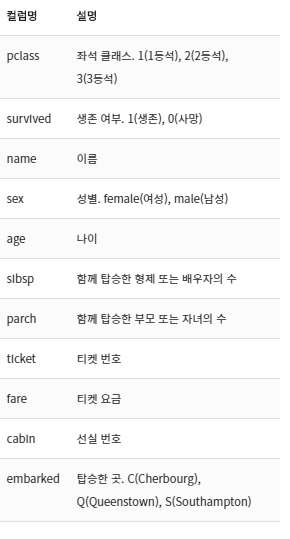               <타이타닉 데이터>

In [7]:
import pandas as pd
url = "C:/Users/HOME/titanic/train.csv"
titanic = pd.read_csv(url)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1. 결측치가 많고 불필요한 컬럼 제거하기

결측치가 50% 이상 되서 제거해야하는 컬럼 : Cabin

In [9]:
titanic.drop('Cabin',axis=1,inplace=True)

In [10]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


불필요한 컬럼 : Panssengerld, Name, Ticket

In [17]:
titanic.drop(['PassengerId','Name','Ticket'], axis=1, inplace = True)

In [18]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 2. 결측치가 있으면 값을 채워주기

In [19]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
import numpy as np
titanic.fillna(titanic['Age'].median())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [25]:
print(titanic['Age'].median())

28.0


### 3. 컴퓨터가 이해할 수 있도록 데이터 변환

In [27]:
titanic.replace(['female','male'],['1','0'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [31]:
titanic['Embarked'].replace(['S','C','Q'],['0','1','2'])

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: object

Text(0.5, 1.0, 'Total Missing Value (%)')

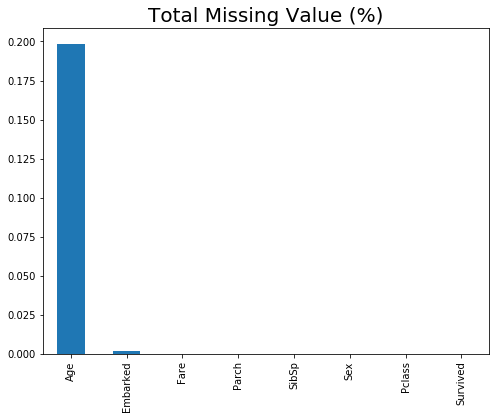

In [38]:
from matplotlib import pyplot as plt
total = titanic.isnull().sum().sort_values(ascending=False)
percent = (titanic.isnull().sum()/titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [39]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


비즈니스 문제 파악 -> 머신러닝 문제로 전환 -> 머신러닝 도입 가능성/필요성 검토 -> 효과검증 설계

머신러닝은 크게 지도학습(예측모델, input, output 데이터 존재)과 비지도학습(input 데이터만 존재)으로 나뉜다. 지도학습은 분류와 예측으로 나뉘고 비지도학습에는 군집화가 있다.

모델&알고리즘 선택 -> 모델 적합 -> 하이퍼파라미터 설정 -> 모델학습 -> 모델 평가

회귀는 실제값과 예측값의 차이, 오차를 통해 모델의 성능을 평가한다. 대표적인 예로 MAE, MASE, RMSE 가 있다. 분류는 실제범주와 예측한 범주의 정확도를 통해 모델의 성능을 평가한다. 예로 혼동행렬, F-measure, ACU 가 있다.

## 2. Bank Target Marketing 데이터

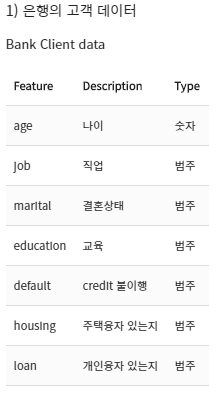

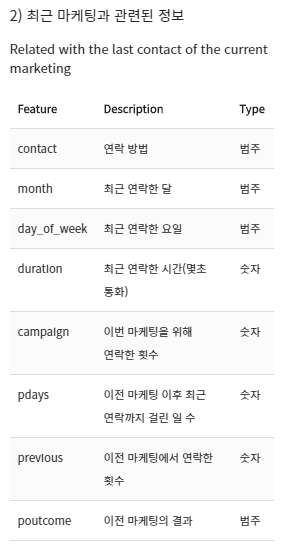

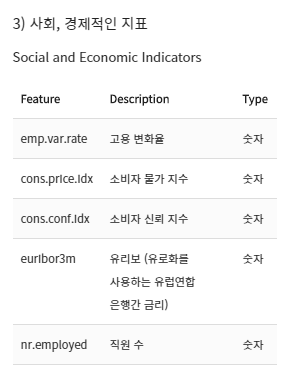

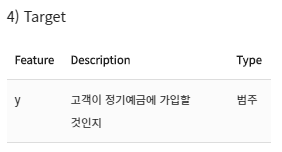

In [49]:
url = "C:/Users/HOME/bank/bank_train.csv"
bank = pd.read_csv(url)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [54]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 3.모델 평가

모델 도입을 통해 기대되는 손익이 더 중요할 수 있다. 기대속익은 어떤 이벤트가 발생활 확률과 그로 인해 발생하는 손익을 계산하여 평가

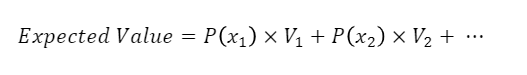

혼동행렬은 분류모델의 성능을 평가할 때 사용하는 지표 TF, FN, FP, TN

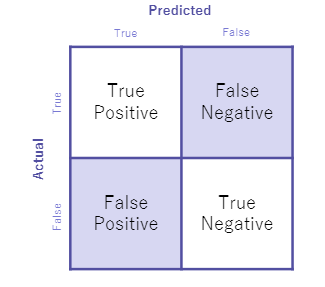

확률행렬은 혼동행렬 값을 확률로 정규화 한 행렬

확률행렬과 비용편익을 분석한 것을 곱해 기대손익을 계산함.
=> 머신러닝 관점에서 정확도가 높고 비즈니스 관점에서 기대손익이 좋은 모델 선택

## 4. numpy.ndarray

### 1) 3 x 4 행렬을 만드세요

In [56]:
import numpy

def matrix_tutorial():
    return numpy.array([[1,4,5,8],[2,1,7,3],[5,4,5,9]])

print(matrix_tutorial())

[[1 4 5 8]
 [2 1 7 3]
 [5 4 5 9]]


### 2) 여러 조건들을 사용해 E를 만드세요

In [76]:
import numpy as np

def matrix_tutorial():
    A = np.array([[1,4,5,8], [2,1,7,3], [5,4,5,9]])
    B = A.reshape((6,2))
    C = np.array([[2,2],[5,3]])
    B = np.concatenate((B,C),axis=0)
    C = B[0:4,]
    D = B[4:8,]
    E = np.concatenate((C,D),axis=1)
    

    
    return E

print(matrix_tutorial())


[[1 4 5 4]
 [5 8 5 9]
 [2 1 2 2]
 [7 3 5 3]]


In [82]:
import numpy

def matrix_tutorial(A):

    A = numpy.array([[1, 2, 3], [1, 2, 1]])
    B = numpy.array([[2, 1, 3], [-1, 0, 5]])
    B = B.transpose()
  
    try:
    #3 - 1
        C = numpy.linalg.inv(B)
        
        result = numpy.sum(C > 0)
    except:
    #3 - 2
        result = 'not invertible'

# 4
    return result


def get_matrix():
# 1
    mat = [] # define mat variable

    first_line = input().strip() # receice first line
    first_line_splitted = first_line.split(" ") # split line by space " "
    n = int(first_line_splitted[0]) # convert to integer
    m = int(first_line_splitted[1]) # convert to integer

    for i in range(n):
        line = input().strip() # receive each line ...
        row = line.split(" ")  # ... and split
        for j in range(m):
            row[j] = int(row[j]) # convert to integer
        mat.append(row)

    return numpy.array(mat)

    if __name__ == "__main__":
        print(matrix_tutorial(get_matrix()))


In [84]:
print(matrix_tutorial(get_matrix()))

3 5
1 2 6 3 8
11 0 -1 3 1
9 0 7 -3 4
not invertible
